In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv(r"C:\Users\Vansh\ADANIPORTS.csv")
df=df.drop(['Symbol'],axis=1)
df=df.drop(['Series'],axis=1)
df=df.drop(['Prev Close'],axis=1)
df=df.drop(['Last'],axis=1)
df=df.drop(['VWAP'],axis=1)
df=df.drop(['Turnover'],axis=1)
df=df.drop(['Trades'],axis=1)
df=df.drop(['Deliverable Volume'],axis=1)
df=df.drop(['%Deliverble'],axis=1)
df

,Date,Open,High,Low,Close,Volume
0,03-01-2011,145.55,146.40,143.05,145.05,487210
1,04-01-2011,146.95,150.50,144.55,148.55,812777
2,05-01-2011,150.10,158.80,149.30,157.60,3254352
3,06-01-2011,158.30,160.00,154.00,154.95,1874274
4,07-01-2011,155.00,155.30,146.10,147.25,781973
...,...,...,...,...,...,...
2553,26-04-2021,733.00,739.65,728.90,730.75,9390549
2554,27-04-2021,735.00,757.50,727.35,749.15,20573107
2555,28-04-2021,755.00,760.00,741.10,746.25,11156977
2556,29-04-2021,753.20,765.85,743.40,746.75,13851910


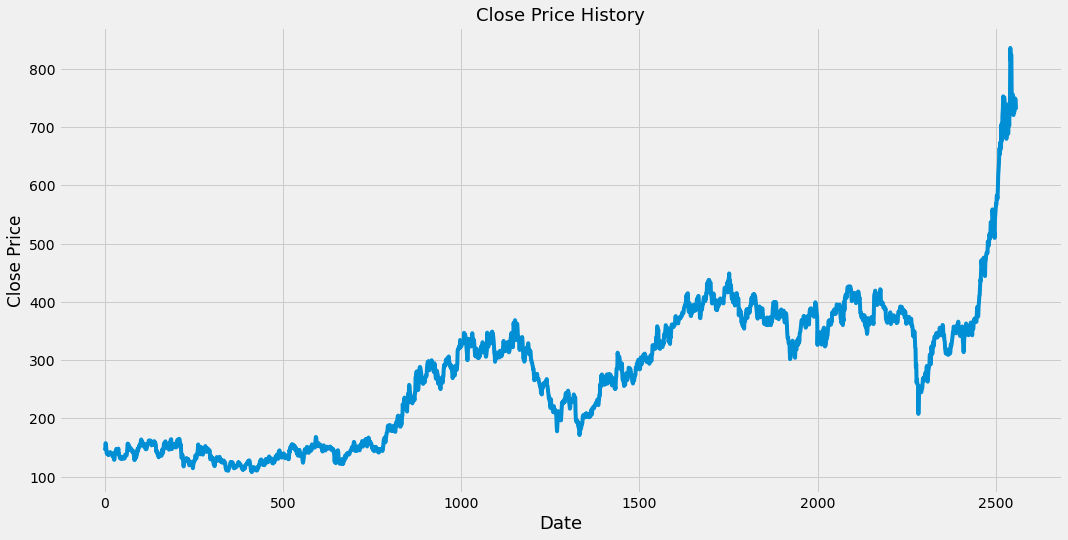

In [3]:
plt.figure(figsize=(16,8))
plt.title("Close Price History",fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.show()

In [4]:
def SMA(data,period=30,column='Close'):
    return data[column].rolling(window=period).mean()

In [5]:
df['SMA']=SMA(df,21)

In [6]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Simple_Returns'] = df['Close'].pct_change(1)
df['Log_Returns']=np.log(1+df['Simple_Returns'])
df['Ratios']=df['Close']/df['SMA']

In [7]:
df

,Date,Open,High,Low,Close,Volume,SMA,Simple_Returns,Log_Returns,Ratios
0,03-01-2011,145.55,146.40,143.05,145.05,487210,NaN,NaN,NaN,NaN
1,04-01-2011,146.95,150.50,144.55,148.55,812777,NaN,0.024130,0.023843,NaN
2,05-01-2011,150.10,158.80,149.30,157.60,3254352,NaN,0.060922,0.059139,NaN
3,06-01-2011,158.30,160.00,154.00,154.95,1874274,NaN,-0.016815,-0.016958,NaN
4,07-01-2011,155.00,155.30,146.10,147.25,781973,NaN,-0.049693,-0.050971,NaN
...,...,...,...,...,...,...,...,...,...,...
2553,26-04-2021,733.00,739.65,728.90,730.75,9390549,744.852381,0.007445,0.007417,0.981067
2554,27-04-2021,735.00,757.50,727.35,749.15,20573107,745.357143,0.025180,0.024868,1.005089
2555,28-04-2021,755.00,760.00,741.10,746.25,11156977,747.233333,-0.003871,-0.003879,0.998684
2556,29-04-2021,753.20,765.85,743.40,746.75,13851910,750.019048,0.000670,0.000670,0.995641


In [8]:
df['Ratios'].describe()

count    2538.000000
mean        1.007300
std         0.056544
min         0.660756
25%         0.973181
50%         1.007239
75%         1.042389
max         1.190700
Name: Ratios, dtype: float64

In [9]:
percentiles=[10,20,50,80,90]
ratios=df['Ratios'].dropna()
percentile_values=np.percentile(ratios,percentiles)
percentile_values

array([0.91470089, 0.96425176, 1.00723883, 1.05156408, 1.10169042])

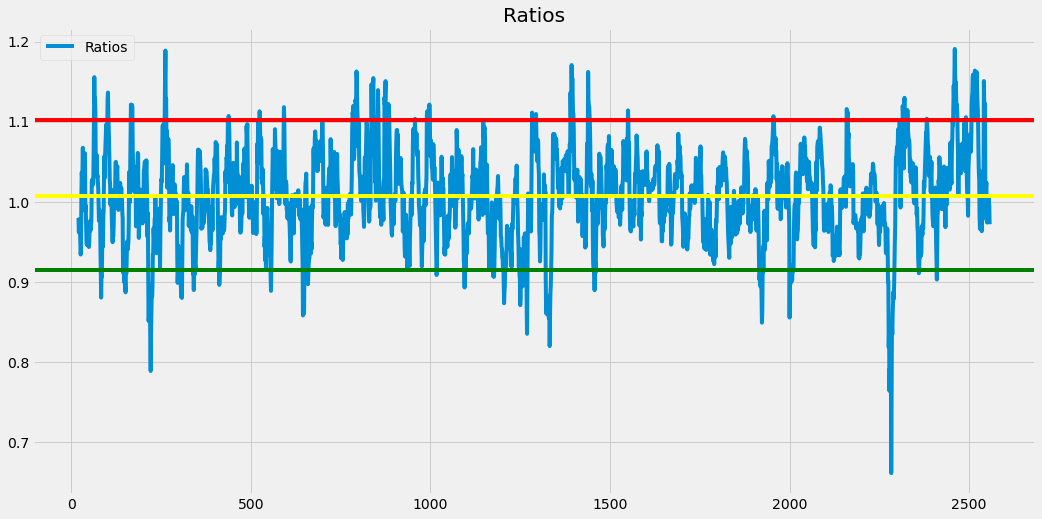

In [11]:
plt.figure(figsize=(16,8))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend=True)
plt.axhline(percentile_values[0],c='Green',label='10th Percentile')
plt.axhline(percentile_values[2],c='Yellow',label='50th Percentile')
plt.axhline(percentile_values[-1],c='Red',label='90th Percentile')